In [2]:
import pandas as pd
data = pd.read_csv('sales_data_with_discounts.csv')

In [3]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
# Descriptive Analytics for Numerical Columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [5]:
# Calculate mean, median, and standard deviation
statistics = data[numerical_columns].agg(['mean', 'median', 'std']).transpose()

# Calculate mode separately as it can return multiple values
modes = data[numerical_columns].mode().transpose()

# Concatenate multiple modes into a single string for each column
modes_combined = modes.apply(lambda x: ', '.join(map(str, x.dropna())), axis=1)
modes_combined.name = 'mode'

# Combine statistics and modes
statistics = statistics.join(modes_combined)

print(statistics)


                           mean       median           std  \
Volume                 5.066667     4.000000      4.231602   
Avg Price          10453.433333  1450.000000  18079.904840   
Total Sales Value  33812.835556  5700.000000  50535.074173   
Discount Rate (%)     15.155242    16.577766      4.220602   
Discount Amount     3346.499424   988.933733   4509.902963   
Net Sales Value    30466.336131  4677.788059  46358.656624   

                                                                mode  
Volume                                                           3.0  
Avg Price                        400.0, 450.0, 500.0, 1300.0, 8100.0  
Total Sales Value                                            24300.0  
Discount Rate (%)  5.007822189204133, 5.055218412429214, 5.059801...  
Discount Amount    69.17794228822787, 73.02519944529182, 93.64916...  
Net Sales Value    326.97480055470817, 330.8220577117721, 466.350...  


In [17]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

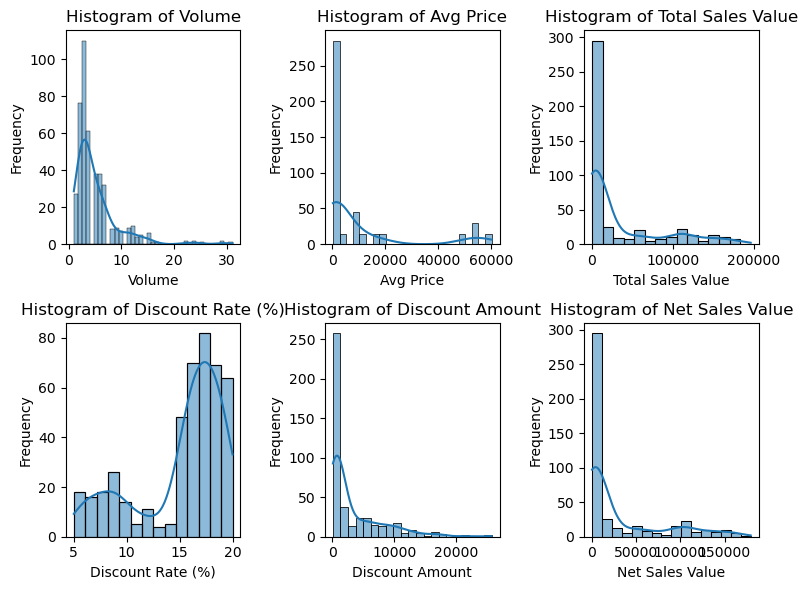

In [38]:
#histrogram
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn._oldcore')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(data[column], ax=ax, kde=True)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

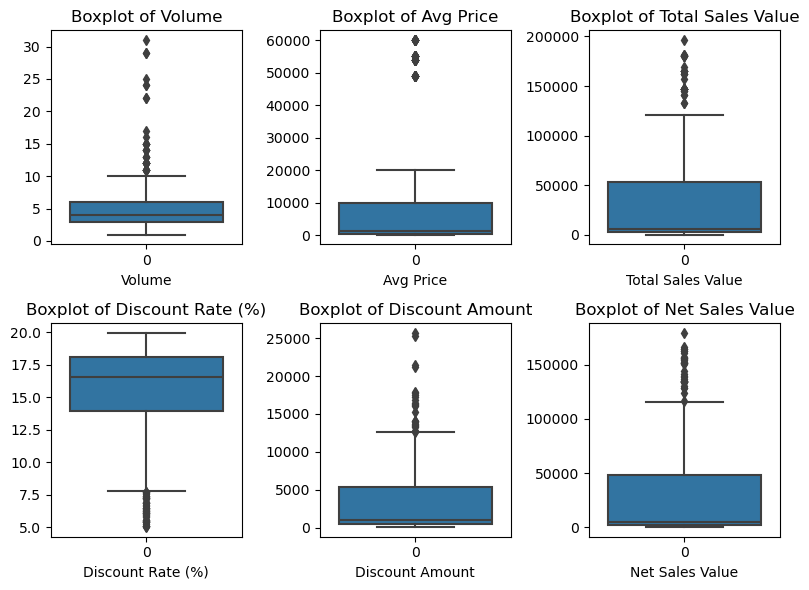

In [39]:
#boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(data[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [7]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


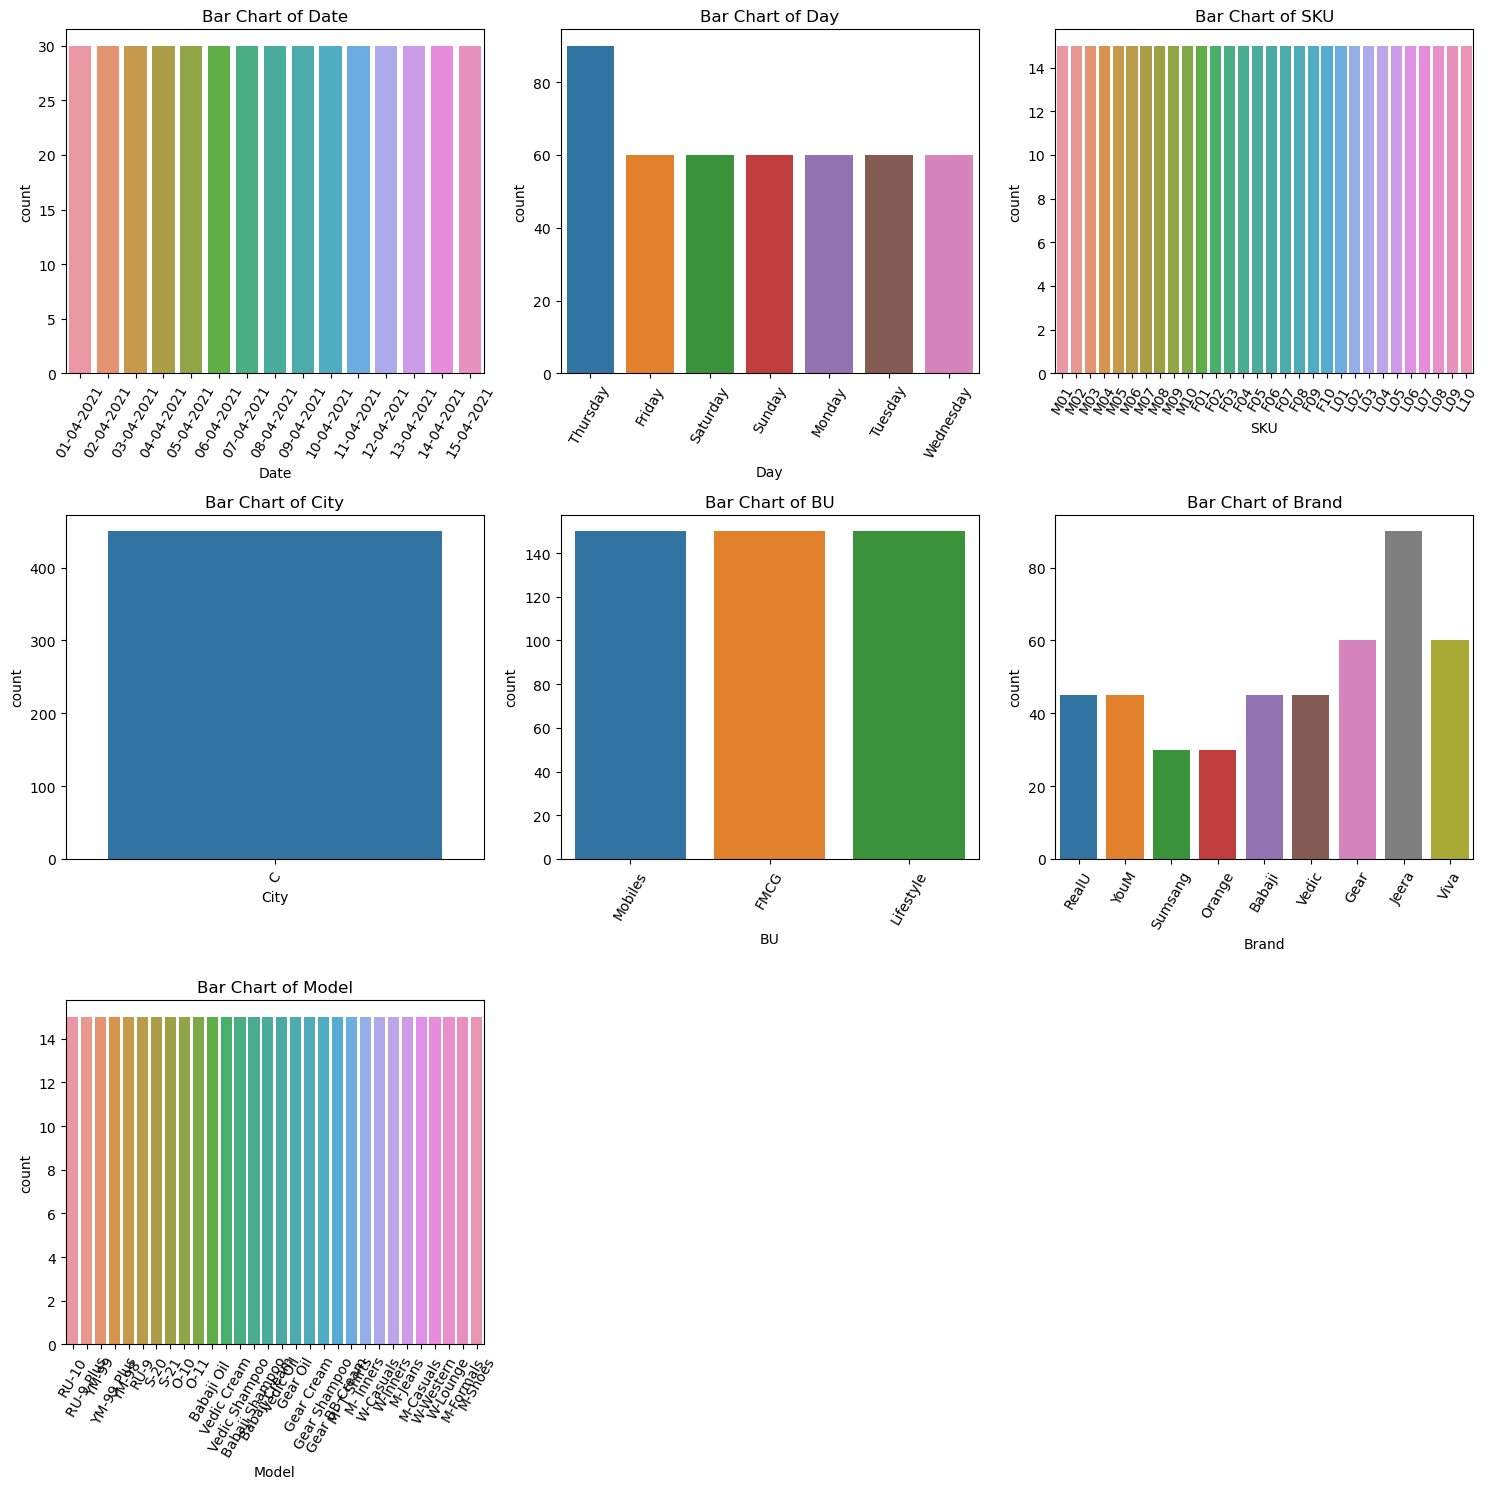

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for ax, column in zip(axes.flatten(), categorical_columns[:7]):
    sns.countplot(x=df[column], ax=ax)  # Pass the column data using the x parameter
    ax.set_title(f'Bar Chart of {column}')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=60)

# Remove empty subplots
for ax in axes.flatten()[len(categorical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [45]:
# Standardize the numerical columns
standardized_data = data[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Display before and after standardization
standardized_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


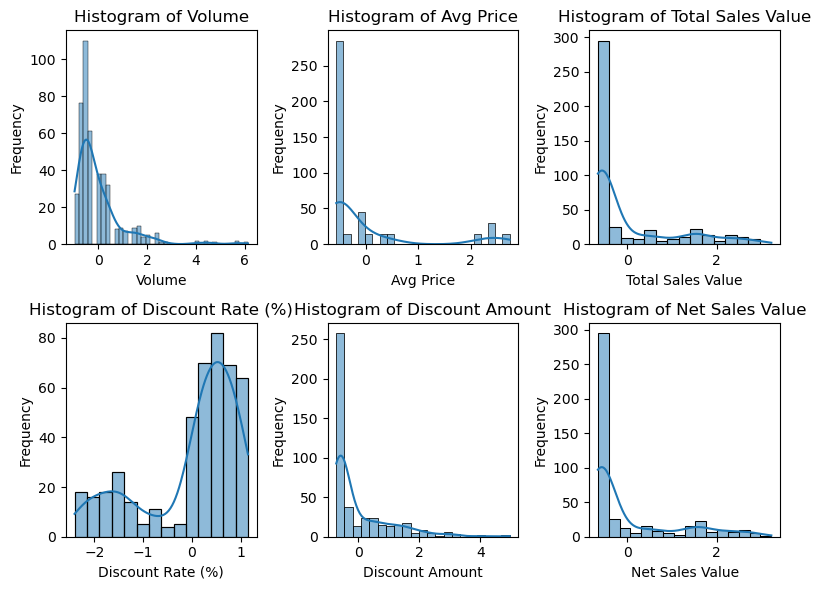

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(standardized_data[column], ax=ax, kde=True)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Apply one-hot encoding to categorical columns
encoded_data = pd.get_dummies(data[categorical_columns], dtype=int)

# Display a portion of the transformed dataset
encoded_data.head()


,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
